# Fama French Benchmark Example
In this notebook, we use pyfolio to analyze the returns of a single stock using the canonical Fama-French factors as the benchmark.

We plot the rolling betas to the Fama-French factors, and run the Bayesian tear sheet for an out-of-sample period of two months.

In [1]:
import sys
sys.path.append('/Users/george/Desktop/pyfolio/')
sys.path

['',
 '/Users/george/anaconda/lib/python36.zip',
 '/Users/george/anaconda/lib/python3.6',
 '/Users/george/anaconda/lib/python3.6/lib-dynload',
 '/Users/george/anaconda/lib/python3.6/site-packages',
 '/Users/george/anaconda/lib/python3.6/site-packages/Sphinx-1.5.6-py3.6.egg',
 '/Users/george/anaconda/lib/python3.6/site-packages/aeosa',
 '/Users/george/anaconda/lib/python3.6/site-packages/setuptools-27.2.0-py3.6.egg',
 '/Users/george/anaconda/lib/python3.6/site-packages/IPython/extensions',
 '/Users/george/.ipython',
 '/Users/george/Desktop/pyfolio/']

In [2]:
import pyfolio as pf
import matplotlib.pyplot as plt
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Get the single stock returns
stock_rets = pf.utils.get_symbol_rets('FB')

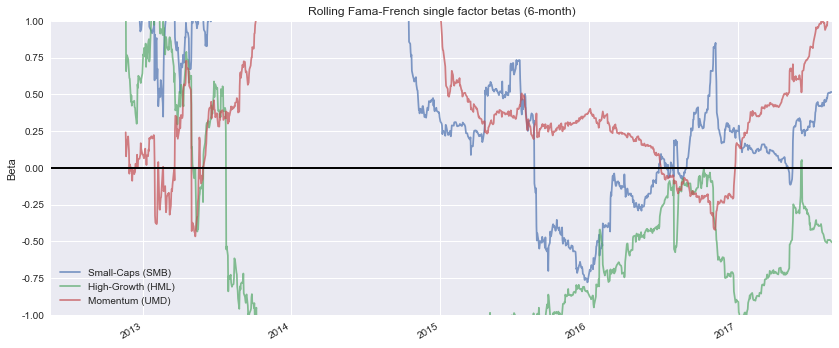

In [5]:
# With just the stock returns, we can plot the rolling betas to the Fama-French factors.
# No need to actually compute the rolling betas; pyfolio does that for us!
fig, ax = plt.subplots(figsize=[14, 6])
pf.plotting.plot_rolling_fama_french(stock_rets, ax=ax)

In [6]:
# However, for the bayesian tear sheet, we will actually need the rolling betas,
# so use pyfolio to get them
rolling_beta = pf.timeseries.rolling_fama_french(stock_rets)

# pf.timeseries.rolling_beta defaults to a 6-month trailing window.
# Thus, the first 6 months' data will be NaNs, which we must drop
rolling_beta.dropna(inplace=True)

In [7]:
rolling_beta.head()

,SMB,HML,Mom
Date,,,
2012-11-20 00:00:00+00:00,1.064788,1.283250,0.242012
2012-11-21 00:00:00+00:00,1.528191,0.658291,0.078740
2012-11-23 00:00:00+00:00,1.232070,0.767785,0.166490
2012-11-26 00:00:00+00:00,1.366909,0.742015,0.214160
2012-11-27 00:00:00+00:00,1.372172,0.700392,0.159386


In [ ]:
# Suppose the last 2 months were our out-of-sample period
out_of_sample = stock_rets.index[-60]

# Use pyfolio to run the bayesian tear sheet.
# The bayesian tear sheet's back end makes heavy use of pymc3, so there will be
# a lot of graphical output before the actual tear sheet
pf.tears.create_bayesian_tear_sheet(stock_rets, live_start_date=out_of_sample, benchmark_rets=rolling_beta)

Running T model
Optimization terminated successfully.
         Current function value: -3113.664255
         Iterations: 3
         Function evaluations: 117


100%|██████████| 2000/2000 [00:01<00:00, 1328.55it/s]



Finished T model (required 238.11 seconds).

Running BEST model


 64%|██████▍   | 1598/2500 [02:30<01:51,  8.09it/s]